# 1 Exploratery Data Analysis

## 1a. Load all datasets

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

pd.set_option("display.max_columns", 200)
pd.set_option("display.float_format", "{:.3f}".format)

sns.set(style="whitegrid", context="notebook")


In [35]:
DATA_PATH = Path("home-credit-default-risk")

b = pd.read_csv(DATA_PATH / "bureau.csv")

In [36]:
b

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.000,-153.000,NaN,0,91323.000,0.000,NaN,0.000,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.000,NaN,NaN,0,225000.000,171342.000,NaN,0.000,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.000,NaN,NaN,0,464323.500,NaN,NaN,0.000,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.000,NaN,NaN,0.000,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.000,NaN,77674.500,0,2700000.000,NaN,NaN,0.000,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.000,NaN,0.000,0,11250.000,11250.000,0.000,0.000,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.000,-2493.000,5476.500,0,38130.840,0.000,0.000,0.000,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.000,-970.000,NaN,0,15570.000,NaN,NaN,0.000,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.000,-1513.000,NaN,0,36000.000,0.000,0.000,0.000,Consumer credit,-1508,NaN


In [37]:

files = {
    "application_train": "application_train.csv",
    "bureau": "bureau.csv",
    "bureau_balance": "bureau_balance.csv",
    "credit_card_balance": "credit_card_balance.csv",
    "installments_payments": "installments_payments.csv",
    "POS_CASH_balance": "POS_CASH_balance.csv",
    "previous_application": "previous_application.csv",
}
dfs = {}
for k, v in files.items():
    print(k)
    dfs[k] = pd.read_csv(DATA_PATH / v)


application_train
bureau
bureau_balance
credit_card_balance
installments_payments
POS_CASH_balance
previous_application


In [38]:
for k, v in dfs.items():
    print(f"{k}: {v.shape}")

application_train: (307511, 122)
bureau: (1716428, 17)
bureau_balance: (27299925, 3)
credit_card_balance: (3840312, 23)
installments_payments: (13605401, 8)
POS_CASH_balance: (10001358, 8)
previous_application: (1670214, 37)


In [40]:
dfs['application_train']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [46]:
app = dfs["application_train"]

app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [45]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


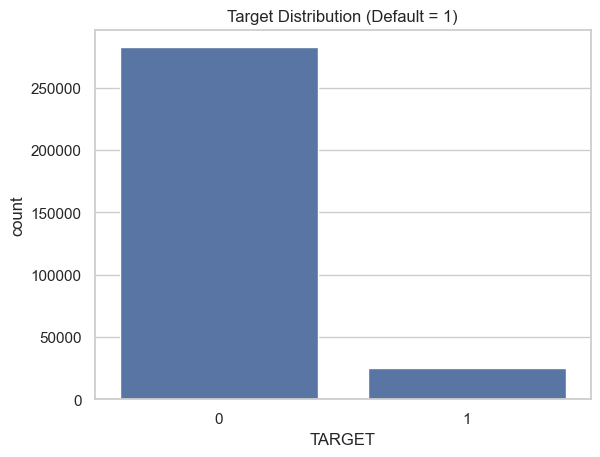

In [43]:
sns.countplot(x="TARGET", data=app)
plt.title("Target Distribution (Default = 1)")
plt.show()


# 1c. Missing Value Analysis

In [48]:
def missing_summary(df):
    missing = df.isna().sum()
    missing_pct = missing / len(df) * 100
    return (
        pd.DataFrame({"missing": missing, "missing_pct": missing_pct})
        .query("missing > 0")
        .sort_values("missing_pct", ascending=False)
    )

missing_app = missing_summary(app)
missing_app.head(20)


,missing,missing_pct
COMMONAREA_MEDI,214865,69.872
COMMONAREA_MODE,214865,69.872
COMMONAREA_AVG,214865,69.872
NONLIVINGAPARTMENTS_MODE,213514,69.433
NONLIVINGAPARTMENTS_MEDI,213514,69.433
NONLIVINGAPARTMENTS_AVG,213514,69.433
FONDKAPREMONT_MODE,210295,68.386
LIVINGAPARTMENTS_AVG,210199,68.355
LIVINGAPARTMENTS_MEDI,210199,68.355
LIVINGAPARTMENTS_MODE,210199,68.355


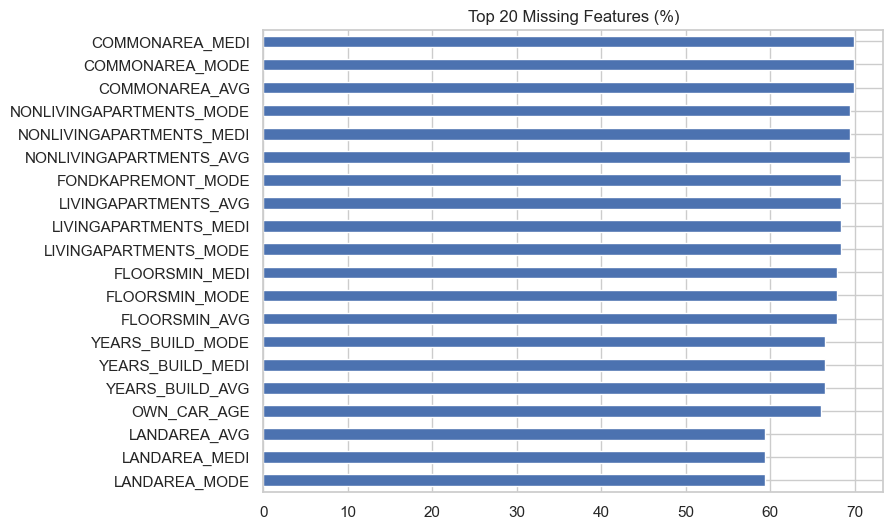

In [49]:
plt.figure(figsize=(8, 6))
missing_app["missing_pct"].head(20).plot(kind="barh")
plt.title("Top 20 Missing Features (%)")
plt.gca().invert_yaxis()
plt.show()


# 1d. Feature types

In [50]:
categorical_cols = app.select_dtypes(include="object").columns
numerical_cols = app.select_dtypes(exclude="object").columns

print("Categorical:", len(categorical_cols))
print("Numerical:", len(numerical_cols))


Categorical: 16
Numerical: 106


# 1e. Numerical feature distribution

In [51]:
app[numerical_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.000,278180.519,102790.175,100002.000,189145.500,278202.000,367142.500,456255.000
TARGET,307511.000,0.081,0.272,0.000,0.000,0.000,0.000,1.000
CNT_CHILDREN,307511.000,0.417,0.722,0.000,0.000,0.000,1.000,19.000
AMT_INCOME_TOTAL,307511.000,168797.919,237123.146,25650.000,112500.000,147150.000,202500.000,117000000.000
AMT_CREDIT,307511.000,599026.000,402490.777,45000.000,270000.000,513531.000,808650.000,4050000.000
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.000,0.007,0.111,0.000,0.000,0.000,0.000,9.000
AMT_REQ_CREDIT_BUREAU_WEEK,265992.000,0.034,0.205,0.000,0.000,0.000,0.000,8.000
AMT_REQ_CREDIT_BUREAU_MON,265992.000,0.267,0.916,0.000,0.000,0.000,0.000,27.000
AMT_REQ_CREDIT_BUREAU_QRT,265992.000,0.265,0.794,0.000,0.000,0.000,0.000,261.000


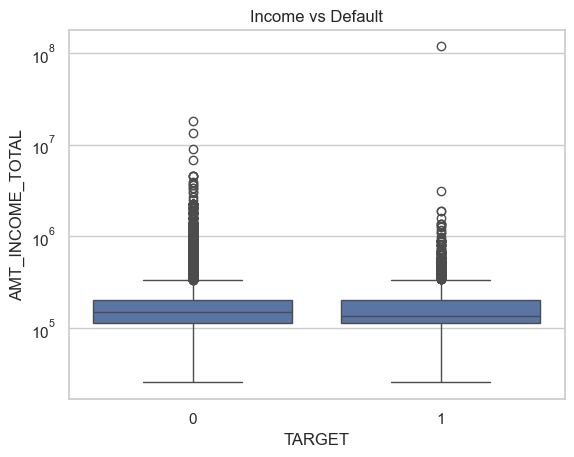

In [52]:
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=app)
plt.yscale("log")
plt.title("Income vs Default")
plt.show()


# 1f. Correlation with TARGET

In [53]:
corr = app[numerical_cols].corr()["TARGET"].sort_values()

corr.head(10)
corr.tail(10)


FLAG_DOCUMENT_3               0.044
REG_CITY_NOT_LIVE_CITY        0.044
FLAG_EMP_PHONE                0.046
REG_CITY_NOT_WORK_CITY        0.051
DAYS_ID_PUBLISH               0.051
DAYS_LAST_PHONE_CHANGE        0.055
REGION_RATING_CLIENT          0.059
REGION_RATING_CLIENT_W_CITY   0.061
DAYS_BIRTH                    0.078
TARGET                        1.000
Name: TARGET, dtype: float64

In [54]:
corr.drop("TARGET").abs().sort_values(ascending=False).head(15)


EXT_SOURCE_3                  0.179
EXT_SOURCE_2                  0.160
EXT_SOURCE_1                  0.155
DAYS_BIRTH                    0.078
REGION_RATING_CLIENT_W_CITY   0.061
REGION_RATING_CLIENT          0.059
DAYS_LAST_PHONE_CHANGE        0.055
DAYS_ID_PUBLISH               0.051
REG_CITY_NOT_WORK_CITY        0.051
FLAG_EMP_PHONE                0.046
DAYS_EMPLOYED                 0.045
REG_CITY_NOT_LIVE_CITY        0.044
FLAG_DOCUMENT_3               0.044
FLOORSMAX_AVG                 0.044
FLOORSMAX_MEDI                0.044
Name: TARGET, dtype: float64

# 1g. Create engineered ratios

In [55]:
app["CREDIT_INCOME_RATIO"] = app["AMT_CREDIT"] / app["AMT_INCOME_TOTAL"]
app["ANNUITY_INCOME_RATIO"] = app["AMT_ANNUITY"] / app["AMT_INCOME_TOTAL"]
app["CREDIT_TERM"] = app["AMT_CREDIT"] / app["AMT_ANNUITY"]

app[["CREDIT_INCOME_RATIO", "ANNUITY_INCOME_RATIO", "CREDIT_TERM"]].describe()


,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,CREDIT_TERM
count,307511.000,307499.000,307499.000
mean,3.958,0.181,21.612
std,2.690,0.095,7.824
min,0.005,0.000,8.037
25%,2.019,0.115,15.614
50%,3.265,0.163,20.000
75%,5.160,0.229,27.100
max,84.737,1.876,45.305


# 1h. Bureau table analysis

In [56]:
bureau = dfs["bureau"]

bureau.head()
bureau.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [57]:
bureau["CREDIT_ACTIVE"].value_counts()


CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

# Aggregate bureau data per customer

In [58]:
bureau_agg = bureau.groupby("SK_ID_CURR").agg(
    bureau_loan_count=("SK_ID_BUREAU", "count"),
    bureau_active_loans=("CREDIT_ACTIVE", lambda x: (x == "Active").sum()),
    bureau_closed_loans=("CREDIT_ACTIVE", lambda x: (x == "Closed").sum()),
    bureau_total_credit=("AMT_CREDIT_SUM", "sum"),
    bureau_debt=("AMT_CREDIT_SUM_DEBT", "sum"),
    bureau_overdue=("AMT_CREDIT_SUM_OVERDUE", "sum"),
).reset_index()

bureau_agg.head()


,SK_ID_CURR,bureau_loan_count,bureau_active_loans,bureau_closed_loans,bureau_total_credit,bureau_debt,bureau_overdue
0,100001,7,3,4,1453365.000,596686.500,0.000
1,100002,8,2,6,865055.565,245781.000,0.000
2,100003,4,1,3,1017400.500,0.000,0.000
3,100004,2,0,2,189037.800,0.000,0.000
4,100005,3,2,1,657126.000,568408.500,0.000
